# Chapter 4 problems

In [1]:
from sympy import *
init_printing()

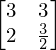

In [2]:
A = Matrix([
[3,     3],
[2, S(3)/2]])
A

In [3]:
b = Matrix([6,5])

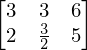

In [4]:
AUG = A.row_join(b)
AUG # the augmented matrix

### Alice

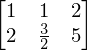

In [9]:
AUGA = AUG.copy()
AUGA[0,:] = AUGA[0,:]/3
AUGA

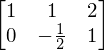

In [10]:
AUGA[1,:] = AUGA[1,:] - 2*AUGA[0,:]
AUGA

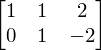

In [11]:
AUGA[1,:] = -2*AUGA[1,:]
AUGA

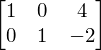

In [12]:
AUGA[0,:] = AUGA[0,:] - AUGA[1,:]
AUGA

### Bob

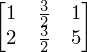

In [17]:
AUGB = AUG.copy()
AUGB[0,:] = AUGB[0,:] - AUGB[1,:]
AUGB

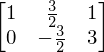

In [18]:
AUGB[1,:] = AUGB[1,:] - 2*AUGB[0,:]
AUGB

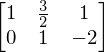

In [19]:
AUGB[1,:] = -1*S(2)/3*AUGB[1,:]
AUGB

In [20]:
AUGB[0,:] = AUGB[0,:] - S(3)/2*AUGB[1,:]
AUGB

### Charlotte

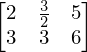

In [25]:
AUGC = AUG.copy()
AUGC[0,:], AUGC[1,:] = AUGC[1,:], AUGC[0,:]
AUGC

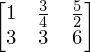

In [26]:
AUGC[0,:] = AUGC[0,:]/2
AUGC

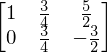

In [27]:
AUGC[1,:] = AUGC[1,:] - 3*AUGC[0,:]
AUGC

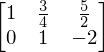

In [28]:
AUGC[1,:] = S(4)/3*AUGC[1,:]
AUGC

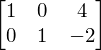

In [29]:
AUGC[0,:] = AUGC[0,:] - S(3)/4*AUGC[1,:]
AUGC